*   [[FELADATOK]](#scrollTo=V7cezpf3zKAI)
*   [[PLOTOK]](#scrollTo=PctZyC6w9HTK)
*   [[IMPORTOK ÉS DF LEKÉRÉSEK]](#scrollTo=VXwR5RZqMuVZ)

**Importok és installok**

In [ ]:
!pip install fake-useragent
import requests
import json
from fake_useragent import UserAgent
import pandas as pd
import random


**getPlayer(name,prc=5.0)**
*   Lekéri az adott játékost a chess.com api segítségével

In [ ]:
def getPlayer(username:str,prc=5.0):
  ua = UserAgent(min_percentage=prc)
  realistic_useragent = ua.random
  resp = requests.get("https://api.chess.com/pub/player/{}".format(username),
                    headers = {'User-Agent' : realistic_useragent } )
  data = resp.json()
  return data

**selectorN(n,data_raw)**

*   Kiválaszt n különböző játékosnevet az adott listából



In [ ]:
def selector(data_raw):
  playerDictionary = {}
  all = len(data_raw)
  counter = 0
  for username in data_raw:
    counter+=1
    playerData = getPlayer(username)
    playerDictionary[username] = playerData
    print(str(counter) + ' / ' + str(all) + ' current player: ' + username)
  return playerDictionary

**getLastGame(username,prc=5.0)**
*   Visszaadja az adott játékos legutolsó meccsét

In [ ]:
def getLastGame(username,prc=5.0):
  ua = UserAgent(min_percentage=prc)
  realistic_useragent = ua.random
  resp = requests.get("https://api.chess.com/pub/player/{}/games/archives".format(username),
                      headers = {'User-Agent':realistic_useragent })
  archivedGames = resp.json()
  if len(archivedGames['archives']) == 0:
    usernames['players'].remove(username)
    return None
  latestGame = archivedGames["archives"][-1]
  resp_game = requests.get(latestGame, headers = {'User-Agent' : realistic_useragent })
  return resp_game.json()['games'][-1]


**getGames(data_players_clean)**
*   Egy letisztított (kis méretű) felhasználónév listából készít az összes játékos legutolsó játékából egy listát

In [ ]:
def getGames(data_players_clean):
  playerGames = {}
  all = len(data_players_clean)
  counter=0
  for username in data_players_clean:
    counter+=1
    game = getLastGame(username)
    print(str(counter) + ' / ' + str(all) + ' current player: ' + username)
    if game is not None:
      playerGames[username] = (game)
  return playerGames

**getTitledPlayers(title,prc=5.0)**
*   Lekéri az adott címmel rendelkező játékosok listáját

In [ ]:
def getTitledPlayers(title,prc=5.0):
  ua = UserAgent(min_percentage=5.0)
  realistic_useragent = ua.random
  resp = requests.get("https://api.chess.com/pub/titled/{}".format(title),
                    headers = {'User-Agent' : realistic_useragent } )
  return resp.json()

**Adatkinyerés**

*   Grand Master
*   Woman Grand Master
*   International Master
*   Woman International Master
*   FIDE Master
*   Woman FIDE Master
*   National Master
*   Woman National Master
*   Candidate Master
*   Woman Candidate Master



In [ ]:
usernames = getTitledPlayers('GM')
data_GMplayers_clean = selector(usernames['players'])
df_gm_players = pd.DataFrame.from_dict(data_GMplayers_clean,orient='index')
df_gm_players['name'] = usernames['players']

games_GMplayers_clean = getGames(data_GMplayers_clean,usernames['players'])
df_gm_games = pd.DataFrame.from_dict(games_GMplayers_clean,orient='index')
df_gm_games['name'] = usernames['players']

df_gm = df_gm_games.merge(df_gm_players, how='left', on='name')
df_gm.to_csv('df_gm.csv', index=False)

1 / 1538 current player: 123lt
2 / 1538 current player: 124chess
3 / 1538 current player: 1977ivan
4 / 1538 current player: 1stsecond
5 / 1538 current player: 4thd-alpeacefulmoon
6 / 1538 current player: 731291
7 / 1538 current player: a-adly
8 / 1538 current player: a-fier
9 / 1538 current player: abasovn
10 / 1538 current player: abbasifarhassan
11 / 1538 current player: abbasovfarid1979
12 / 1538 current player: abdimalik_abdisalimov
13 / 1538 current player: abhidabhi
14 / 1538 current player: abhijeetgupta
15 / 1538 current player: abhijeetgupta1016
16 / 1538 current player: abhijeetonyoutube
17 / 1538 current player: abhyak
18 / 1538 current player: absentzest
19 / 1538 current player: abykhovsky
20 / 1538 current player: aceontheturn
21 / 1538 current player: actorxu
22 / 1538 current player: adaro
23 / 1538 current player: adham_fawzy
24 / 1538 current player: adiosabu
25 / 1538 current player: adotand
26 / 1538 current player: afgano29
27 / 1538 current player: aggy67
28 / 153

In [ ]:
usernames = getTitledPlayers('WGM')
data_WGMplayers_clean = selector(usernames['players'])
df_wgm_players = pd.DataFrame.from_dict(data_WGMplayers_clean,orient='index')
df_wgm_players['name'] = usernames['players']

games_WGMplayers_clean = getGames(data_WGMplayers_clean)
df_wgm_games = pd.DataFrame.from_dict(games_WGMplayers_clean,orient='index')
df_wgm_games['name'] = usernames['players']

df_wgm = df_wgm_games.merge(df_wgm_players, how='left', on='name')
df_wgm.to_csv('df_wgm.csv', index=False)

1 / 221 current player: adriananikolova
2 / 221 current player: ahachess
3 / 221 current player: ahappypawn
4 / 221 current player: alexa797
5 / 221 current player: alyonka0506
6 / 221 current player: ama18
7 / 221 current player: ambotsari
8 / 221 current player: anastasiyakarlovych
9 / 221 current player: andy_rekt
10 / 221 current player: anjelina
11 / 221 current player: anjood
12 / 221 current player: ankudinova_yelena
13 / 221 current player: annamarim2001
14 / 221 current player: anne93
15 / 221 current player: armqueen
16 / 221 current player: artemidaa
17 / 221 current player: ati1517
18 / 221 current player: atousa
19 / 221 current player: aurachess10
20 / 221 current player: awarak
21 / 221 current player: awesomevishesh
22 / 221 current player: axvesik
23 / 221 current player: backlight26
24 / 221 current player: bairakovanova
25 / 221 current player: betulcemreyildiz
26 / 221 current player: bgrabarska
27 / 221 current player: bsnsun
28 / 221 current player: caisachess
29 

In [ ]:
usernames = getTitledPlayers('IM')
data_IMplayers_clean = selector(usernames['players'])
df_im_players = pd.DataFrame.from_dict(data_IMplayers_clean,orient='index')
df_im_players['name'] = usernames['players']

games_IMplayers_clean = getGames(data_IMplayers_clean)
df_im_games = pd.DataFrame.from_dict(games_IMplayers_clean,orient='index')
df_im_games['name'] = usernames['players']

df_im = df_im_games.merge(df_im_players, how='left', on='name')
df_im.to_csv('df_im.csv', index=False)

1 / 2150 current player: 0gzpanda
2 / 2150 current player: 11kevin
3 / 2150 current player: 1e41-0
4 / 2150 current player: 1przemyslaw1
5 / 2150 current player: 1scaramouche1
6 / 2150 current player: 217-16-8
7 / 2150 current player: 2krk1
8 / 2150 current player: 2ktngo
9 / 2150 current player: 60minban
10 / 2150 current player: 690025571
11 / 2150 current player: 72hitman72
12 / 2150 current player: 7hanat
13 / 2150 current player: aaaao
14 / 2150 current player: aariow
15 / 2150 current player: abdoabedov
16 / 2150 current player: abdulovorkhan
17 / 2150 current player: abduzhaparov
18 / 2150 current player: abechahrour
19 / 2150 current player: abikor
20 / 2150 current player: abruptum
21 / 2150 current player: abu_tyven_fra_bagdad
22 / 2150 current player: acciochess
23 / 2150 current player: acostapablo
24 / 2150 current player: adamhunt1
25 / 2150 current player: adar_07
26 / 2150 current player: adityakudeshi
27 / 2150 current player: adriangschnitzer
28 / 2150 current player:

In [ ]:
usernames = getTitledPlayers('WIM')
data_WIMplayers_clean = selector(usernames['players'])
df_wim_players = pd.DataFrame.from_dict(data_WIMplayers_clean,orient='index')
df_wim_players['name'] = usernames['players']

games_WIMplayers_clean = getGames(data_WIMplayers_clean)
df_wim_games = pd.DataFrame.from_dict(games_WIMplayers_clean,orient='index')
df_wim_games['name'] = usernames['players']

df_wim = df_wim_games.merge(df_wim_players, how='left', on='name')
df_wim.to_csv('df_wim.csv', index=False)

1 / 380 current player: 19912131712118
2 / 380 current player: 1995tiger
3 / 380 current player: a-s-00
4 / 380 current player: aakankshachess
5 / 380 current player: abc_sir
6 / 380 current player: abfchess
7 / 380 current player: acaiberryy
8 / 380 current player: agamat
9 / 380 current player: agent_bishopp
10 / 380 current player: agrigo3
11 / 380 current player: akromion2712
12 / 380 current player: alaoneagain
13 / 380 current player: alegro
14 / 380 current player: aleksandramilovic
15 / 380 current player: alekschess100
16 / 380 current player: alfilescruzados
17 / 380 current player: alindsay211
18 / 380 current player: aliso4ka_pirozhok
19 / 380 current player: aloe_normansen
20 / 380 current player: alphienothere
21 / 380 current player: amina175
22 / 380 current player: amylazy
23 / 380 current player: ana_berke
24 / 380 current player: andrakhanova
25 / 380 current player: angychess5
26 / 380 current player: anijak
27 / 380 current player: annakantane
28 / 380 current play

In [ ]:
usernames = getTitledPlayers('FM')
data_FMplayers_clean = selector(usernames['players'])
df_fm_players = pd.DataFrame.from_dict(data_FMplayers_clean,orient='index')
df_fm_players['name'] = usernames['players']

games_FMplayers_clean = getGames(data_FMplayers_clean)
df_fm_games = pd.DataFrame.from_dict(games_FMplayers_clean,orient='index')
df_fm_games['name'] = usernames['players']

df_fm = df_fm_games.merge(df_fm_players, how='left', on='name')
df_fm.to_csv('df_fm.csv', index=False)

Streaming output truncated to the last 5000 lines.
2085 / 3542 current player: mf1966idrisov
2086 / 3542 current player: mfatigue
2087 / 3542 current player: mfberna
2088 / 3542 current player: mfcarlos
2089 / 3542 current player: mfcyryd
2090 / 3542 current player: mfguimaraes
2091 / 3542 current player: mfjohnnyortiz
2092 / 3542 current player: mfschulz
2093 / 3542 current player: mfwagnerpeixoto
2094 / 3542 current player: mf_fraco
2095 / 3542 current player: mf_malo
2096 / 3542 current player: mgoxana
2097 / 3542 current player: miaou33
2098 / 3542 current player: miarpa
2099 / 3542 current player: michaelbaron
2100 / 3542 current player: michaelshahade
2101 / 3542 current player: michael_c_forster
2102 / 3542 current player: michalczak
2103 / 3542 current player: michechess89
2104 / 3542 current player: michellopez159
2105 / 3542 current player: michiganeagle
2106 / 3542 current player: michkoo
2107 / 3542 current player: micke12a
2108 / 3542 current player: micwhite
2109 / 3542 c

In [ ]:
usernames = getTitledPlayers('WFM')
data_WFMplayers_clean = selector(usernames['players'])
df_wfm_players = pd.DataFrame.from_dict(data_WFMplayers_clean,orient='index')
df_wfm_players['name'] = usernames['players']

games_WFMplayers_clean = getGames(data_WFMplayers_clean)
df_wfm_games = pd.DataFrame.from_dict(games_WFMplayers_clean,orient='index')
df_wfm_games['name'] = usernames['players']

df_wfm = df_wfm_games.merge(df_wfm_players, how='left', on='name')
df_wfm.to_csv('df_wfm.csv', index=False)

1 / 669 current player: 011jee
2 / 669 current player: 13queen31
3 / 669 current player: 140mariam
4 / 669 current player: 1spongebob
5 / 669 current player: 4empechement
6 / 669 current player: 4_erg_sakenova
7 / 669 current player: 7next
8 / 669 current player: aalessia
9 / 669 current player: aanna12
10 / 669 current player: aayaisyah
11 / 669 current player: abcdefghiandu
12 / 669 current player: ac0412
13 / 669 current player: accce4ka
14 / 669 current player: ace01
15 / 669 current player: adhararr5
16 / 669 current player: aekaki18
17 / 669 current player: africanqueeeeen
18 / 669 current player: agrawalkiran
19 / 669 current player: ahlamee
20 / 669 current player: ailirpemas
21 / 669 current player: ajames1987
22 / 669 current player: ajmo333
23 / 669 current player: ak212v
24 / 669 current player: akareen11
25 / 669 current player: aleksanchess
26 / 669 current player: aleksandraaleksandrova
27 / 669 current player: alenaku
28 / 669 current player: alena_skvortsova
29 / 669 c

In [ ]:
usernames = getTitledPlayers('NM')
data_NMplayers_clean = selector(usernames['players'])
df_nm_players = pd.DataFrame.from_dict(data_NMplayers_clean,orient='index')
df_nm_players['name'] = usernames['players']

games_NMplayers_clean = getGames(data_NMplayers_clean)
df_nm_games = pd.DataFrame.from_dict(games_NMplayers_clean,orient='index')
df_nm_games['name'] = usernames['players']

df_nm = df_nm_games.merge(df_nm_players, how='left', on='name')
df_nm.to_csv('df_nm.csv', index=False)

1 / 1857 current player: 107degrees
2 / 1857 current player: 123iambob123
3 / 1857 current player: 12teen
4 / 1857 current player: 190l
5 / 1857 current player: 1982lf
6 / 1857 current player: 1bilgen
7 / 1857 current player: 1d4_1-0
8 / 1857 current player: 1d51-0
9 / 1857 current player: 1e41-o
10 / 1857 current player: 1g41-0
11 / 1857 current player: 1lec
12 / 1857 current player: 2012vachamp
13 / 1857 current player: 2165149677570
14 / 1857 current player: 2346pl
15 / 1857 current player: 2good4u734
16 / 1857 current player: 2l8iwun
17 / 1857 current player: 2tilted
18 / 1857 current player: 3ptdka
19 / 1857 current player: 64life
20 / 1857 current player: 6foot7foot
21 / 1857 current player: 777chessnok777
22 / 1857 current player: 827883
23 / 1857 current player: 911master
24 / 1857 current player: 94hawkeye
25 / 1857 current player: aaronmaster123
26 / 1857 current player: abcedarian
27 / 1857 current player: abhishek2
28 / 1857 current player: aborigen_came
29 / 1857 current p

In [ ]:
usernames = getTitledPlayers('WNM')
data_WNMplayers_clean = selector(usernames['players'])
df_wnm_players = pd.DataFrame.from_dict(data_WNMplayers_clean,orient='index')
df_wnm_players['name'] = usernames['players']

games_WNMplayers_clean = getGames(data_WNMplayers_clean)
df_wnm_games = pd.DataFrame.from_dict(games_WNMplayers_clean,orient='index')
df_wnm_games['name'] = usernames['players']

df_wnm = df_wnm_games.merge(df_wnm_players, how='left', on='name')
df_wnm.to_csv('df_wnm.csv', index=False)

1 / 16 current player: arvielozano1
2 / 16 current player: chickay
3 / 16 current player: crushernt
4 / 16 current player: elayzzzuh
5 / 16 current player: francois2002
6 / 16 current player: glysend
7 / 16 current player: icaughtacrab
8 / 16 current player: jeaniiiusk
9 / 16 current player: kajoyskie
10 / 16 current player: luachess1
11 / 16 current player: madmax011
12 / 16 current player: mglmgl2017
13 / 16 current player: nikajurisnicolas
14 / 16 current player: resolute31524
15 / 16 current player: rinoasadey
16 / 16 current player: vaniavindy
1 / 16 current player: arvielozano1
2 / 16 current player: chickay
3 / 16 current player: crushernt
4 / 16 current player: elayzzzuh
5 / 16 current player: francois2002
6 / 16 current player: glysend
7 / 16 current player: icaughtacrab
8 / 16 current player: jeaniiiusk
9 / 16 current player: kajoyskie
10 / 16 current player: luachess1
11 / 16 current player: madmax011
12 / 16 current player: mglmgl2017
13 / 16 current player: nikajurisnicola

In [ ]:
usernames = getTitledPlayers('CM')
data_CMplayers_clean = selector(usernames['players'])
df_cm_players = pd.DataFrame.from_dict(data_CMplayers_clean,orient='index')
df_cm_players['name'] = usernames['players']

games_CMplayers_clean = getGames(data_CMplayers_clean)
df_cm_games = pd.DataFrame.from_dict(games_CMplayers_clean,orient='index')
df_cm_games['name'] = usernames['players']

df_cm = df_cm_games.merge(df_cm_players, how='left', on='name')
df_cm.to_csv('df_cm.csv', index=False)

1 / 1459 current player: 19andi73
2 / 1459 current player: 1ara12
3 / 1459 current player: 1b31-0
4 / 1459 current player: 1c4_1-0
5 / 1459 current player: 1e42ke21-0
6 / 1459 current player: 1gelm9ister
7 / 1459 current player: 1nikolachess
8 / 1459 current player: 2007checkmate
9 / 1459 current player: 20ofjuly
10 / 1459 current player: 21osakat
11 / 1459 current player: 2sks
12 / 1459 current player: 2typicalchessplayer
13 / 1459 current player: 335394862
14 / 1459 current player: 50tugrik
15 / 1459 current player: a3aki
16 / 1459 current player: aaponter
17 / 1459 current player: abbesali
18 / 1459 current player: abc_xyz4744
19 / 1459 current player: abelmat
20 / 1459 current player: abigailcabezas
21 / 1459 current player: abinesh12345
22 / 1459 current player: abuhanan
23 / 1459 current player: acertijo08
24 / 1459 current player: achalachess
25 / 1459 current player: acollins05
26 / 1459 current player: actuary44
27 / 1459 current player: adchek
28 / 1459 current player: adnan_

In [ ]:
usernames = getTitledPlayers('WCM')
data_WCMplayers_clean = selector(usernames['players'])
df_wcm_players = pd.DataFrame.from_dict(data_WCMplayers_clean,orient='index')
df_wcm_players['name'] = usernames['players']

games_WCMplayers_clean = getGames(data_WCMplayers_clean)
df_wcm_games = pd.DataFrame.from_dict(games_WCMplayers_clean,orient='index')
df_wcm_games['name'] = usernames['players']

df_wcm = df_wcm_games.merge(df_wcm_players, how='left', on='name')
df_wcm.to_csv('df_wcm.csv', index=False)

1 / 372 current player: 1ncogn1to
2 / 372 current player: 222222aaaaddddfcdds
3 / 372 current player: aartikd
4 / 372 current player: abdodi
5 / 372 current player: adrianapalao
6 / 372 current player: aiakos2
7 / 372 current player: ailime26
8 / 372 current player: aishachess227
9 / 372 current player: aisha_zakirova
10 / 372 current player: alanna-cl
11 / 372 current player: albita10
12 / 372 current player: alekhinegirl
13 / 372 current player: ambition-elite
14 / 372 current player: amec24
15 / 372 current player: amnaawadi
16 / 372 current player: ananya_245
17 / 372 current player: anastacialopez
18 / 372 current player: andjela_djidjika
19 / 372 current player: angel_lys_66
20 / 372 current player: anna20240
21 / 372 current player: annelainej
22 / 372 current player: anspiracje
23 / 372 current player: antosey
24 / 372 current player: anu-triz
25 / 372 current player: appalm
26 / 372 current player: araya_p
27 / 372 current player: ariadna_atreides
28 / 372 current player: arin

**Tisztítás**

NOTE: innentől tessék végigkattintgatni

**getPlayers(df, n)**
*   megadja egy párként a két játékost aki játszott a játékban (fehér, fekete)

In [ ]:
def getPlayers(df, n: int):
  start = df['white'][n].find('username') + 12
  stop = df['white'][n].find('uuid')  - 4
  whitename = df['white'][n][start:stop]
  start = df['black'][n].find('username') + 12
  stop = df['black'][n].find('uuid')  - 4
  blackname = df['black'][n][start:stop]
  return (whitename,blackname)

**getECO(df, n)**
*   megadja az éppen játszott nyitást

In [ ]:
def getECO(df, n:int):
  if type(df['pgn'][n]) is float:
    return None
  if df['pgn'][n].find('ECO') == -1:
    return None
  start = df['pgn'][n].find('ECO')
  eco = df['pgn'][n][start:start+10]
  eco_final = eco[eco.find(' '):eco.find(' ')+5].strip()
  if eco_final[0] == '"':
    eco_final = eco_final[1:]
  if eco_final[-1] == '"':
    eco_final = eco_final[:-1]
  return eco_final

**getOutcome(df, n)**
*   megadja a játszma kimenetelét

In [ ]:
def getOutcome(df, n: int):
  if type(df['pgn'][n]) is float:
    return None
  if df['pgn'][n].find('Termination') == -1:
    return None
  start = df['pgn'][n].find('Termination') + 13
  stop = df['pgn'][n].find('StartTime') - 4
  outcome = df['pgn'][n][start:stop]
  return outcome.lower()

**victory(outcome, username)**
*   egy kimenetel alapján eldönti a játékról hogy győzelem, vereség vagy döntetlen

In [ ]:
def victory(outcome: str, username: str):
  tmp = ''
  mode = ''
  name = outcome[:outcome.find('won')-1]
  if name == username:
    tmp = 'win'
  elif outcome[outcome.rfind(" ")+1:].strip() == 'stalemate':
    tmp = 'stalemate'
  else:
    tmp = 'lose'
  mode = outcome[outcome.rfind(" ")+1:]
  return (tmp,mode)

**getSteps(df, n)**
*   megadja egy játszma lépéseit, és lépésideit (fehér lépések, fekete lépések, fehér lépésidő,  fekete lépésidő)

In [ ]:
def getSteps(df,n: int):
  if type(df['pgn'][n]) is float:
    return None
  start = df['pgn'][n].find('Link') + 53
  if df['pgn'][n].find('Link') == -1:
    return None
  steps = df['pgn'][n][start:]
  total_steps = []
  white_steps = []
  black_steps = []
  white_times = []
  black_times = []
  arr = steps.split('. ')
  white=True
  first=True
  for original_step in arr:
    if first:
      first = False
      continue
    step = original_step[:original_step.find('{')-1]
    time = original_step[original_step.find('%clk ') + 5 : original_step.find('}') - 1]
    if original_step.find('%clk') == -1:
      time = None
    if white:
      white_steps.append(step)
      if time is not None:
        white_times.append(time)
    else:
      black_steps.append(step)
      if time is not None:
        black_times.append(time)
    white = not white
    total_steps.append(step)
  if len(white_steps) == 0:
    white_steps = None
  if len(black_steps) == 0:
    black_steps = None
  if len(total_steps) == 0:
    total_steps = None
  return (white_steps, black_steps, white_times, black_times,total_steps)

**avgTime(deltas)**
*   megadja egy listányi deltából az átlagos lépésidőt

In [ ]:
import datetime as dt

def avgTime(deltas):
  if deltas is None:
    return None
  counter=0
  allDelta = dt.timedelta(days=0,hours=0,minutes=0,seconds=0,microseconds=0)
  for delta in deltas:
    allDelta += delta
    counter+=1
  if counter == 0:
    return None
  avg = allDelta / counter
  return avg.total_seconds()

**deltaSteps(times)**
*   megadja egy listányi lépés deltáit

In [ ]:
def deltaSteps(times):
  counter=0
  deltas = []
  if len(times) == 0 or len(times) == 1:
    return None
  for i in range(0,len(times)-1):
    time1 = times[i]
    time2 = times[i+1]
    if time1[1] == ':':
      time1 = '0' + time1
    if time1[-1]=='.':
      time1 += '0'
    if time1[-2]=='.':
      time1 += '0'
    if time1[-3]=='.':
      time1 += '0'
    arr1 = time1.split(':')
    days = 0
    hours = 0
    minutes = 0
    seconds = 0
    hours = int(arr1[0])
    minutes = int(arr1[1])
    if arr1[2].find('.') != -1:
      seconds = int(arr1[2][:arr1[2].find('.')])
    else:
      seconds = int(arr1[2])
    days = (hours - hours%24) / 24
    hours = hours%24
    delta1 = dt.timedelta(days=days,hours=hours,minutes=minutes,seconds=seconds)

    if time2[1] == ':':
      time2 = '0' + time2
    if time2[-1]=='.':
      time2 += '0'
    if time2[-2]=='.':
      time2 += '0'
    if time2[-3]=='.':
      time2 += '0'
    arr2 = time2.split(':')
    days = 0
    hours = 0
    minutes = 0
    seconds = 0
    hours = int(arr2[0])
    minutes = int(arr2[1])
    if arr2[2].find('.') != -1:
      seconds = int(arr2[2][:arr2[2].find('.')])
    else:
      seconds = int(arr2[2])
    days = (hours - hours%24) / 24
    hours = hours%24
    delta2 = dt.timedelta(days=days,hours=hours,minutes=minutes,seconds=seconds)

    delta = delta1 - delta2
    deltas.append(delta)
  if len(deltas) == 0:
    return None
  return deltas

**mostUsedPiece(moves)**
*   megadja egy játszmában a lépésekből a legtöbbet léptetett bábút

In [ ]:
def mostUsedPiece(moves, is_pawn_valid = True):
  if moves is not None:
    r_counter = 0
    n_counter = 0
    b_counter = 0
    q_counter = 0
    k_counter = 0
    p_counter = 0
    for move in moves:
      if move[0] == 'B':
        move = move[1:]
      if move == 'O-O' or move == 'O-O-O':
        r_counter+=1
        k_counter+=1
      elif move[0] == 'N':
        n_counter+=1
      elif move[0] == 'R':
        r_counter+=1
      elif move[0] == 'B':
        b_counter+=1
      elif move[0] == 'Q':
        q_counter+=1
      elif move[0] == 'K':
        k_counter+=1
      else:
        p_counter+=1
    r_counter/=2
    n_counter/=2
    b_counter/=2
    p_counter/=10
    counters = [r_counter, n_counter, b_counter, q_counter, k_counter, p_counter]
    counters.sort()
    max = counters[-1]
    if not is_pawn_valid:
      if max == p_counter:
        max = counters[-2]
      if max == r_counter:
        return 'rook'
      if max == n_counter:
        return 'knight'
      if max == b_counter:
        return 'bishop'
      if max == q_counter:
        return 'queen'
      if max == k_counter:
        return 'king'
    else:
      if max == r_counter:
        return 'rook'
      if max == n_counter:
        return 'knight'
      if max == b_counter:
        return 'bishop'
      if max == q_counter:
        return 'queen'
      if max == k_counter:
        return 'king'
      if max == p_counter:
        return 'pawn'
    return None

In [ ]:
import pandas as pd
# credit to Destaq for the openings database, https://github.com/Destaq
df_opening_codes = pd.read_csv('https://raw.githubusercontent.com/Destaq/chess-graph/master/elo_reading/openings_sheet.csv')

In [ ]:
def findOpeningName(ECO,steps):
  opening = None
  for i in range(0,len(df_opening_codes)):
    if ECO == df_opening_codes['ECO'][i]:
      if opening == None:
        opening = df_opening_codes['name'][i]
      moves = df_opening_codes['moves']
      tmp = True
      if len(moves) > len(steps):
        length = len(steps)
      else:
        length = len(moves)
      for j in range(0,length):
        if steps[j] != moves[j]:
          tmp = False
          break
      if tmp:
        opening = df_opening_codes['name'][i]
  return opening

**cleaner(df)**
*   megtisztít egy DataFramet és emberek által olvashatóvá teszi

In [ ]:
def cleaner(df):
  players = []
  for i in range(0,len(df)):
    player = []
    player.append(df['name'][i])
    print(i+1, '/', len(df), 'current player: ' + df['name'][i])
    tmp_players = getPlayers(df,i)
    if tmp_players[0].lower() == player[0]:
      player.append('white')
      player.append('black')
      player.append(tmp_players[1].lower())
    else:
      player.append('black')
      player.append('white')
      player.append(tmp_players[0].lower())
    opening = getECO(df, i)
    outcome = getOutcome(df, i)
    mode = None
    if outcome is not None:
      tmp = victory(outcome,df['name'][i])
      outcome = tmp[0]
      mode = tmp[1]
    steps = getSteps(df,i)
    white_steps = None
    black_steps = None
    total_player_steps = None
    opening_name = None
    num_white_steps = None
    num_black_steps = None
    total_steps = None
    white_times = None
    white_avg_time = None
    black_times = None
    black_avg_time = None
    if steps is not None:
      white_steps = steps[0]
      white_piece = mostUsedPiece(white_steps)
      black_steps = steps[1]
      black_piece = mostUsedPiece(black_steps)
      total_player_steps = steps[4]
      if total_player_steps is not None and opening is not None:
        opening_name = findOpeningName(opening,total_player_steps)
      if white_steps is not None:
        num_white_steps = len(white_steps)
      if black_steps is not None:
        num_black_steps = len(black_steps)
      if num_white_steps is not None and num_black_steps is not None:
        total_steps = num_white_steps + num_black_steps
      elif num_white_steps is not None:
        total_steps = num_white_steps
      elif num_black_steps is not None:
        total_steps = num_black_steps
      else:
        total_steps = None
      white_times = steps[2]
      deltas_white = deltaSteps(white_times)
      white_avg_time = avgTime(deltas_white)
      black_times = steps[3]
      deltas_black = deltaSteps(black_times)
      black_avg_time = avgTime(deltas_black)
    player.append(opening)
    player.append(opening_name)
    player.append(outcome)
    player.append(mode)
    player.append(white_steps)
    player.append(white_piece)
    player.append(black_steps)
    player.append(black_piece)
    player.append(num_white_steps)
    player.append(num_black_steps)
    player.append(total_steps)
    player.append(total_player_steps)
    player.append(white_times)
    player.append(white_avg_time)
    player.append(black_times)
    player.append(black_avg_time)
    players.append(player)
  df_clean = pd.DataFrame(players, columns = ['name','color','opponent_color','opponent','ECO','opening','outcome','mode','white_steps','white_fav_piece','black_steps','black_fav_piece','num_white_steps','num_black_steps','total_steps','steps','white_times','white_avg_time','black_times','black_avg_time'])
  return df_clean

In [ ]:
!pip install fake-useragent
import requests
import json
from fake_useragent import UserAgent
import pandas as pd
import random

**load_dfs()**
*   betölti a 10 rang DataFramejeit a github repomról

In [ ]:
original_url = 'https://github.com/yarathealmighty/chessDSproject/blob/main/df_cm.csv'

def load_dfs():
  dfs =  []
  titles = ['gm','wgm','im','wim','fm','wfm','nm','wnm','cm','wcm']
  counter=0
  for title in titles:
    counter+=1
    url = original_url[:63] + title +'.csv'
    url = url.replace("github.com", "raw.githubusercontent.com").replace("/blob/", "/")
    print(counter,'/',len(titles),'current url: ', url)
    df = pd.read_csv(url, index_col=0)
    dfs.append(df)
  return dfs

dfs = load_dfs()

df_gm = dfs[0]
df_wgm = dfs[1]
df_im = dfs[2]
df_wim = dfs[3]
df_fm = dfs[4]
df_wfm = dfs[5]
df_nm = dfs[6]
df_wnm = dfs[7]
df_cm  = dfs[8]
df_wcm = dfs[9]

df_gm_clean = cleaner(df_gm)
df_wgm_clean = cleaner(df_wgm)
df_im_clean = cleaner(df_im)
df_wim_clean = cleaner(df_wim)
df_fm_clean = cleaner(df_fm)
df_wfm_clean = cleaner(df_wfm)
df_nm_clean = cleaner(df_nm)
df_wnm_clean = cleaner(df_wnm)
df_cm_clean = cleaner(df_cm)
df_wcm_clean = cleaner(df_wcm)

df_gm_total = pd.concat([df_gm_clean,df_wgm_clean], ignore_index=True)
df_im_total = pd.concat([df_im_clean,df_wim_clean], ignore_index=True)
df_fm_total = pd.concat([df_fm_clean,df_wfm_clean], ignore_index=True)
df_nm_total = pd.concat([df_nm_clean,df_wnm_clean], ignore_index=True)
df_cm_total = pd.concat([df_cm_clean,df_wcm_clean], ignore_index=True)

data_size = len(df_gm) + len(df_wgm) + len(df_im) + len(df_wim) + len(df_fm) + len(df_wfm) + len(df_nm) + len(df_wnm) + len(df_cm) + len(df_wcm)

df_total = pd.concat([df_gm_total,df_im_total,df_fm_total,df_nm_total,df_cm_total], ignore_index=True)

A streamkimeneten csak az utolsó 5000 sor látható.
2823 / 3508 current player: shadowvoyager
2824 / 3508 current player: shadyh9
2825 / 3508 current player: shaheus
2826 / 3508 current player: shakkivainaa
2827 / 3508 current player: shalfhide
2828 / 3508 current player: sharkanto55
2829 / 3508 current player: sharkarton
2830 / 3508 current player: sharpcube
2831 / 3508 current player: shaunpress
2832 / 3508 current player: shaya01
2833 / 3508 current player: shazilthegoat2006
2834 / 3508 current player: shazuli9878
2835 / 3508 current player: shcufnairolf
2836 / 3508 current player: sheayt
2837 / 3508 current player: sherlock00007
2838 / 3508 current player: shevtsjenko
2839 / 3508 current player: shieldingoff
2840 / 3508 current player: shimloi
2841 / 3508 current player: shiroglantalibov
2842 / 3508 current player: shivacalypso
2843 / 3508 current player: shivakaka
2844 / 3508 current player: shivananda1964
2845 / 3508 current player: shnitez
2846 / 3508 current player: shokuedi
284

Ezekből legalább 3-at csináljuk meg az első mérföldkőhöz:

*   [[kész] Fekete/fehér winrate viszgálat](#scrollTo=bUTBtHa7iDEw)
*   [[kész] Legtöbbet léptetett bábú](#scrollTo=-6jKI3pliycH)
*   [[hiányzó adat] Átlagos idő/lépés](#scrollTo=Tajmx90Muefy)
*   [megoldásra vár] Feladások/lépés
*   [[kész] Játékok aránya amik mattal/pattal értek véget](#scrollTo=q6rI6tskyCH1)
*   [[megoldásra vár] Melyik nyitás melyik ellen hasznos](#scrollTo=-SVTAu7yOLXn)

**Fekete/fehér winrate viszgálat**

In [ ]:
def winRateColorPlot(df,plot_type,title):
  total_white = df[df['color'] == 'white'].outcome.value_counts()
  total_black = df[df['color'] == 'black'].outcome.value_counts()
  w_stats = winRate(total_white)
  w_win_perc = w_stats[0]
  w_loss_perc = w_stats[1]
  b_stats = winRate(total_black)
  b_win_perc = b_stats[0]
  b_loss_perc = b_stats[1]
  print('White win rate: '+str(w_win_perc*100)+'%')
  print('White lose rate: '+str(w_loss_perc*100)+'%')
  print('White stalemate rate: '+str(100.0 - ((w_loss_perc*100) + (w_win_perc*100)))+'%')
  print('Black win rate: '+str(b_win_perc*100)+'%')
  print('Black lose rate: '+str(b_loss_perc*100)+'%')
  print('Black stalemate rate: '+str(100.0 - ((b_loss_perc*100) + (b_win_perc*100)))+'%')
  return pd.crosstab(df.outcome,df_gm_clean.color).plot(kind=plot_type, subplots =True,title='Győzelmi arányok játékos színétől függően ' + title + ' rangon',figsize=(16,8),legend=False)

In [ ]:
def winRate(total_matches):
  total = 0
  wins = 0
  loses = 0
  for i in range(0,len(total_matches)):
    if total_matches.axes[0][i]=='win':
      wins = total_matches[i]
    if total_matches.axes[0][i]=='lose':
      loses = total_matches[i]
    total += total_matches[i]
  win_perc = wins/total
  loss_perc = loses/total
  return (win_perc,loss_perc)

White win rate: 51.72839506172839%
White lose rate: 47.77777777777778%
White stalemate rate: 0.49382716049382225%
Black win rate: 44.546498277841565%
Black lose rate: 54.42020665901263%
Black stalemate rate: 1.0332950631458004%


array([<Axes: ylabel='black'>, <Axes: ylabel='white'>], dtype=object)

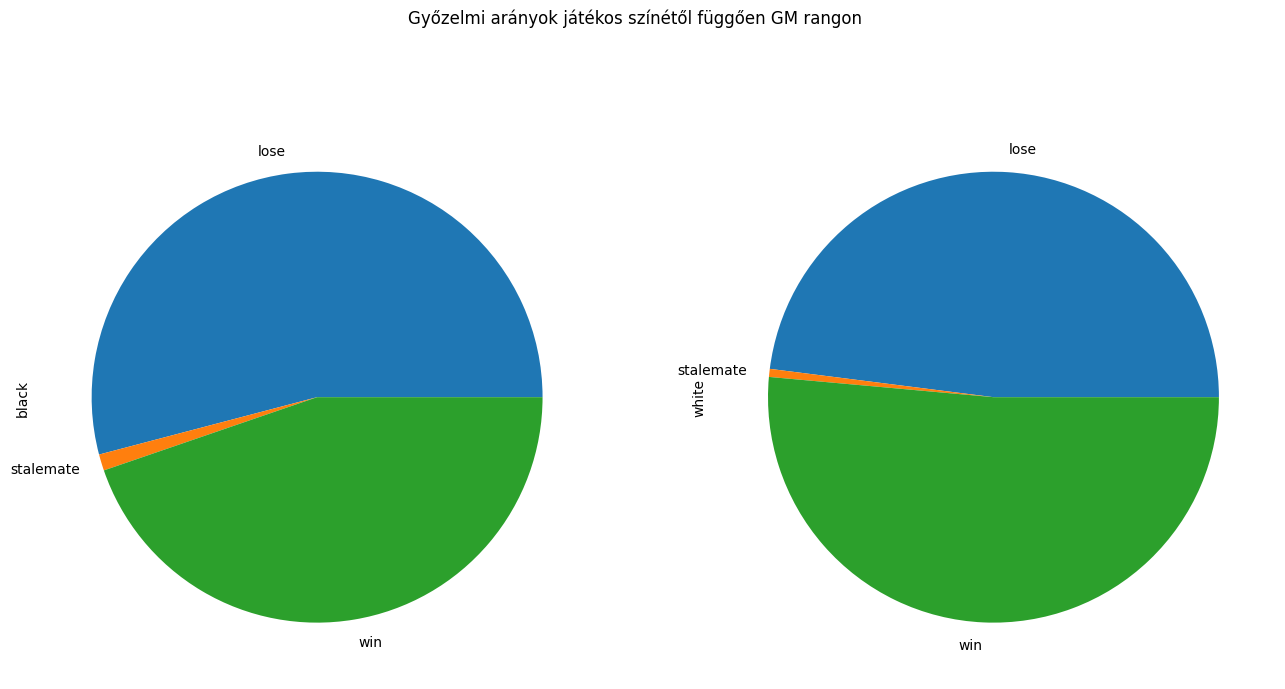

In [ ]:
winRateColorPlot(df_gm_total,'pie','GM')

**Legtöbbet léptetett bábú**

NOTE: implementálni úgy hogy a pawnokat figyelmen kívül hagyjuk

In [ ]:
def pieces(df):
  white_pieces = df[df['color'] == 'white']['white_fav_piece']
  black_pieces = df[df['color'] == 'black']['black_fav_piece']
  fav_pieces = pd.concat([white_pieces, black_pieces], axis=0)
  return fav_pieces.value_counts()

In [ ]:
def favPiecesPlot(df,plot_type,title):
  s_pieces = pieces(df)
  print(s_pieces)
  s_pieces.plot(kind=plot_type ,title='Legtöbbet léptetett bábú ' + title + ' rangon',figsize=(16,8),legend=False)

queen     566
king      408
knight    328
rook      236
bishop    149
pawn        6
Name: count, dtype: int64


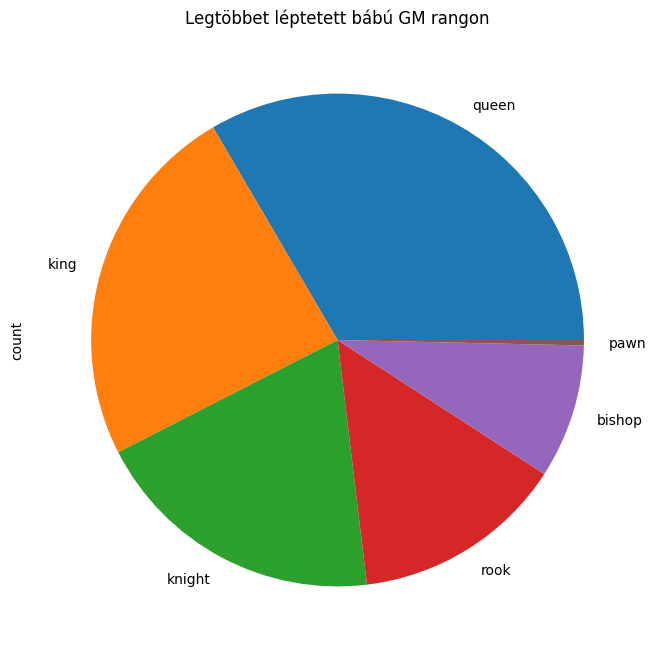

In [ ]:
favPiecesPlot(df_gm_total,'pie','GM')

**Átlagos idő/lépés**

NOTE: van negatív és hatalmas érték a levelező gamek miatt, find solution for that

In [ ]:
white_time = df_gm_clean[df_gm_clean['color'] == 'white']['white_avg_time']
black_time = df_gm_clean[df_gm_clean['color'] == 'black']['black_avg_time']
black_time

2        2.866667
4        1.965517
5        5.451613
7        4.212121
11       3.232558
          ...    
1475     2.460317
1478     3.068966
1479    14.327869
1480     4.954545
1485     0.722222
Name: black_avg_time, Length: 775, dtype: float64

**Játékok aránya amik mattal/pattal értek véget**

NOTE: a közös megegyezés pattnak számít, ahogy a lépésismétlés és a nem elegendő mattadó bábú is

In [ ]:
def getCorS(df,plotType,title):
  checkmates = len(df[df['mode']=='checkmate'])
  stalemates = len(df[(df['mode']=='stalemate') | (df['mode']=='agreement') | (df['mode']=='repetition') | ((df['mode']=='material') & df['outcome']=='stalemate')])
  df['mode'].value_counts().plot(kind=plotType,subplots=True,  ylabel='', legend=False, title='Játékvégződések viszonyítása ' + title + ' rangon',figsize=(16,8))
  c_or_s = df[(df['mode'] =='checkmate') | (df['mode'] =='stalemate') | (df['mode']=='agreement')| (df['mode']=='repetition') | ((df['mode']=='material') & df['outcome']=='stalemate')]
  print('Games ended by Checkmate or Stalemate: ',len(c_or_s))
  print('Games ended by Checkmate: ',checkmates)
  print('Games ended by Stalemate: ',stalemates)

Games ended by Checkmate or Stalemate:  373
Games ended by Checkmate:  253
Games ended by Stalemate:  120


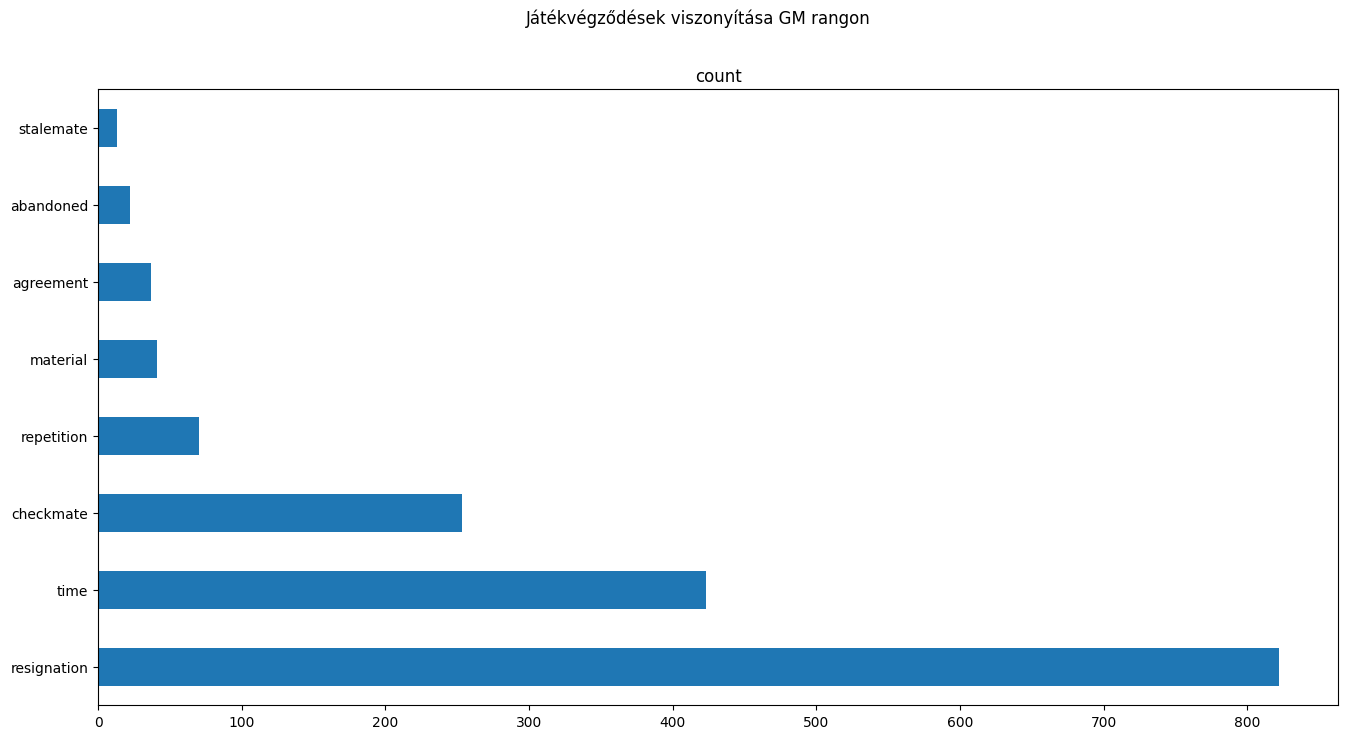

In [ ]:
getCorS(df_gm_total,'barh','GM')

**PÉLDA**
GM plots:

White win rate: 51.72839506172839%
White lose rate: 47.77777777777778%
White stalemate rate: 0.49382716049382225%
Black win rate: 44.546498277841565%
Black lose rate: 54.42020665901263%
Black stalemate rate: 1.0332950631458004%


array([<Axes: ylabel='black'>, <Axes: ylabel='white'>], dtype=object)

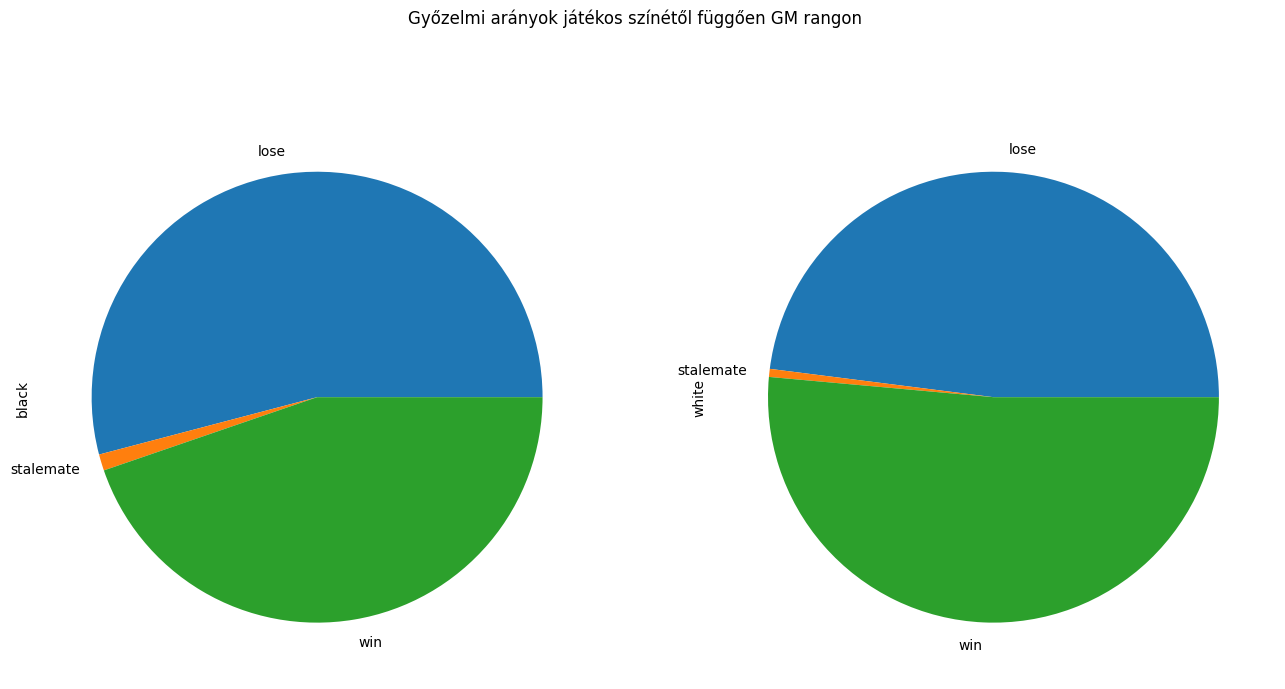

In [ ]:
winRateColorPlot(df_gm_total,'pie','GM')

queen     566
king      408
knight    328
rook      236
bishop    149
pawn        6
Name: count, dtype: int64


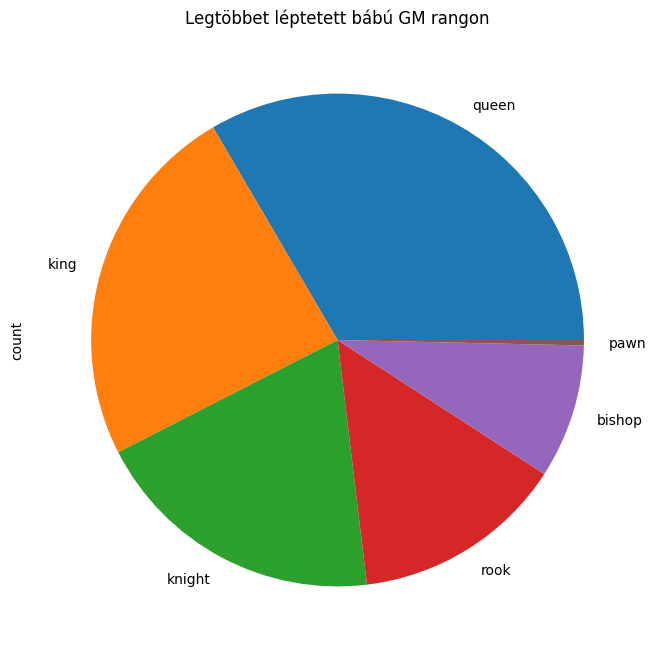

In [ ]:
favPiecesPlot(df_gm_total,'pie','GM')

Games ended by Checkmate or Stalemate:  373
Games ended by Checkmate:  253
Games ended by Stalemate:  120


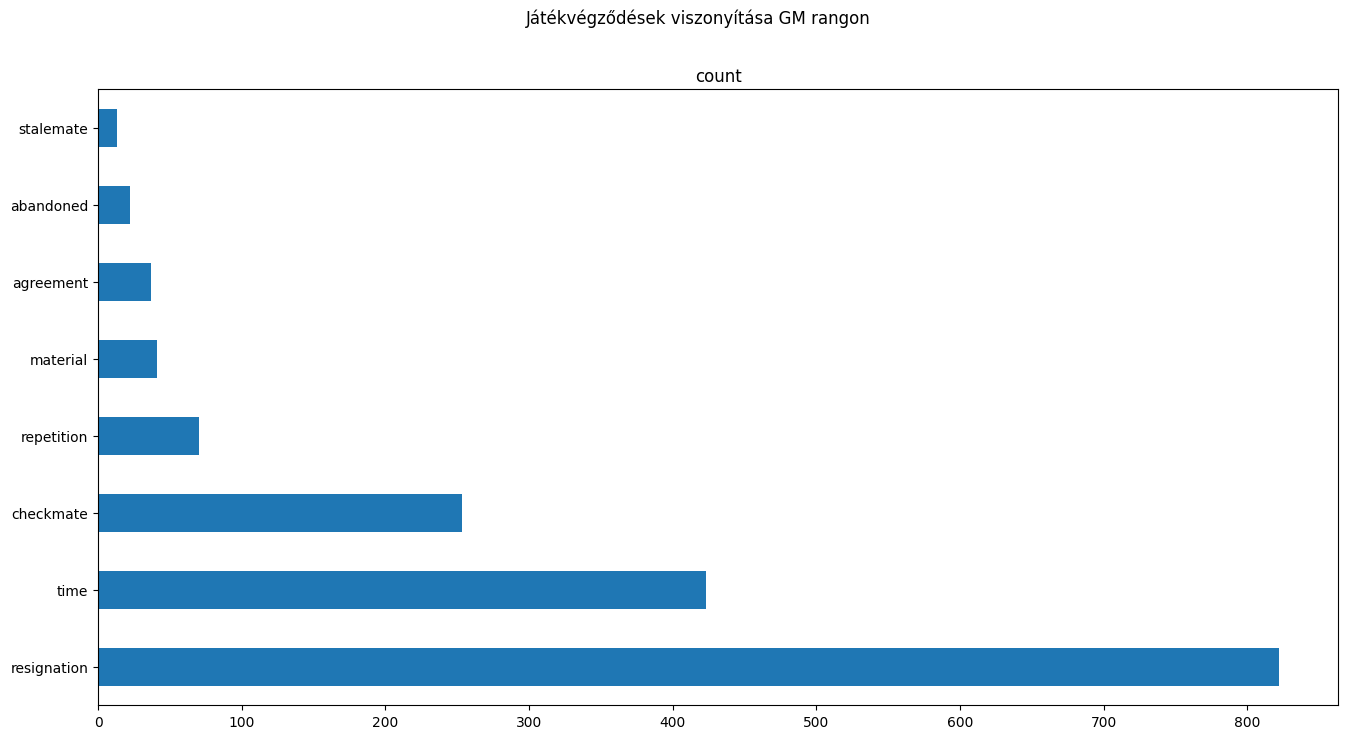

In [ ]:
getCorS(df_gm_total,'barh','GM')

In [ ]:
def get_w_b_winrates(df):
  total_white = df[df['color'] == 'white'].outcome.value_counts()
  total_black = df[df['color'] == 'black'].outcome.value_counts()
  w_stats = winRate(total_white)
  w_win_perc = w_stats[0]
  w_loss_perc = w_stats[1]
  b_stats = winRate(total_black)
  b_win_perc = b_stats[0]
  b_loss_perc = b_stats[1]
  return (w_win_perc,w_loss_perc,b_win_perc,b_loss_perc)

White win rate: 51.72839506172839%
White lose rate: 47.77777777777778%
White stalemate rate: 0.49382716049382225%
Black win rate: 44.546498277841565%
Black lose rate: 54.42020665901263%
Black stalemate rate: 1.0332950631458004%
White win rate: 51.70691090757702%
White lose rate: 47.87676935886761%
White stalemate rate: 0.416319733555369%
Black win rate: 44.48%
Black lose rate: 55.120000000000005%
Black stalemate rate: 0.4000000000000057%
White win rate: 48.64864864864865%
White lose rate: 50.859950859950864%
White stalemate rate: 0.4914004914004835%
Black win rate: 43.5538387252535%
Black lose rate: 56.01158860453887%
Black stalemate rate: 0.43457267020762913%
White win rate: 52.370689655172406%
White lose rate: 46.875%
White stalemate rate: 0.7543103448275872%
Black win rate: 48.873873873873876%
Black lose rate: 50.56306306306306%
Black stalemate rate: 0.5630630630630549%
White win rate: 46.54983570646221%
White lose rate: 52.573932092004384%
White stalemate rate: 0.8762322015334121%


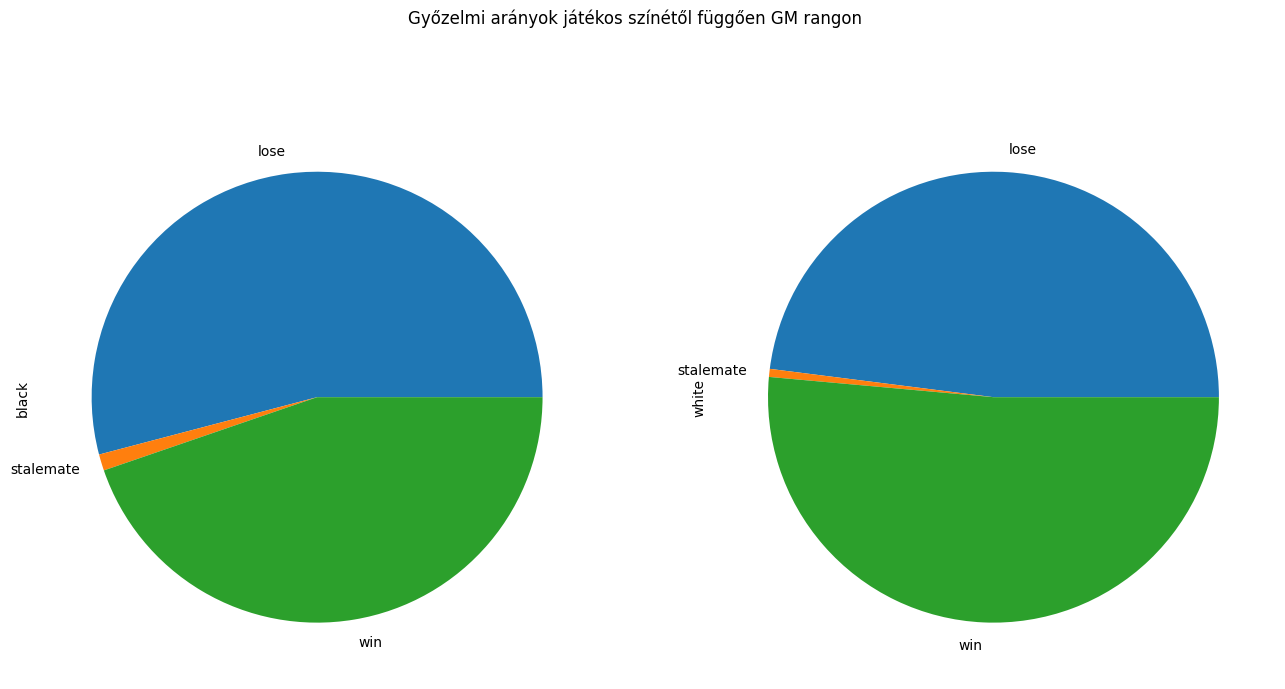

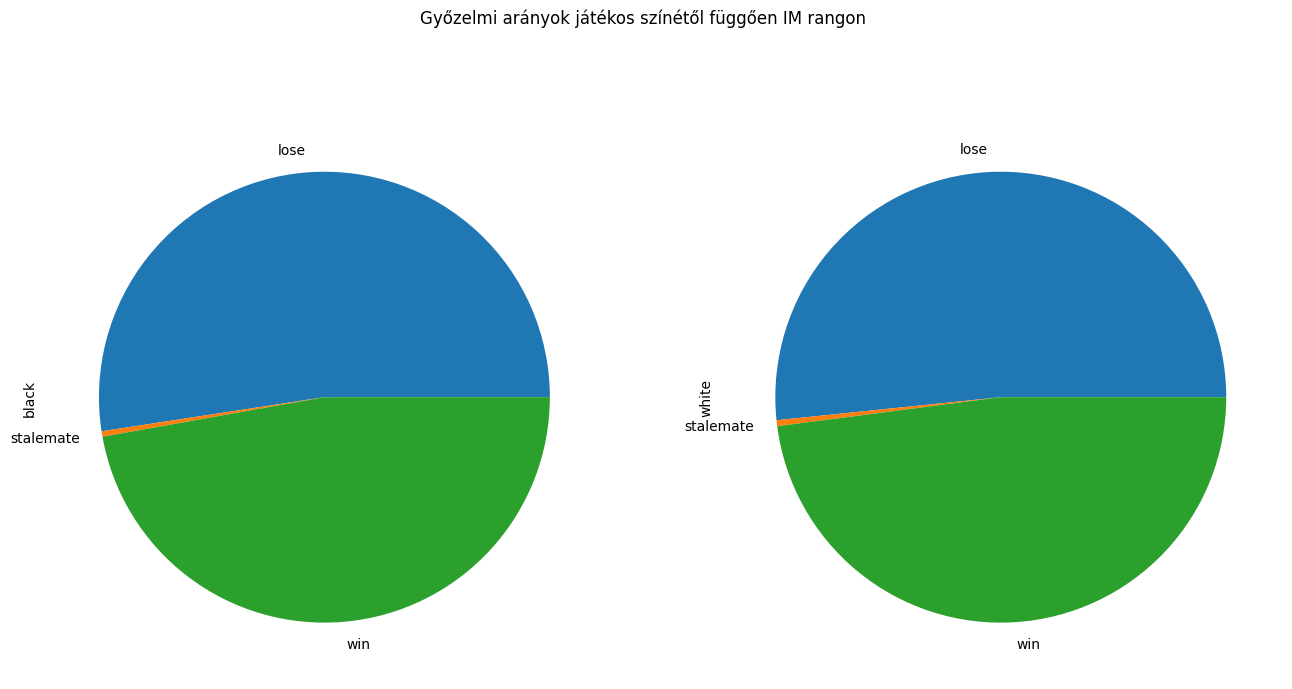

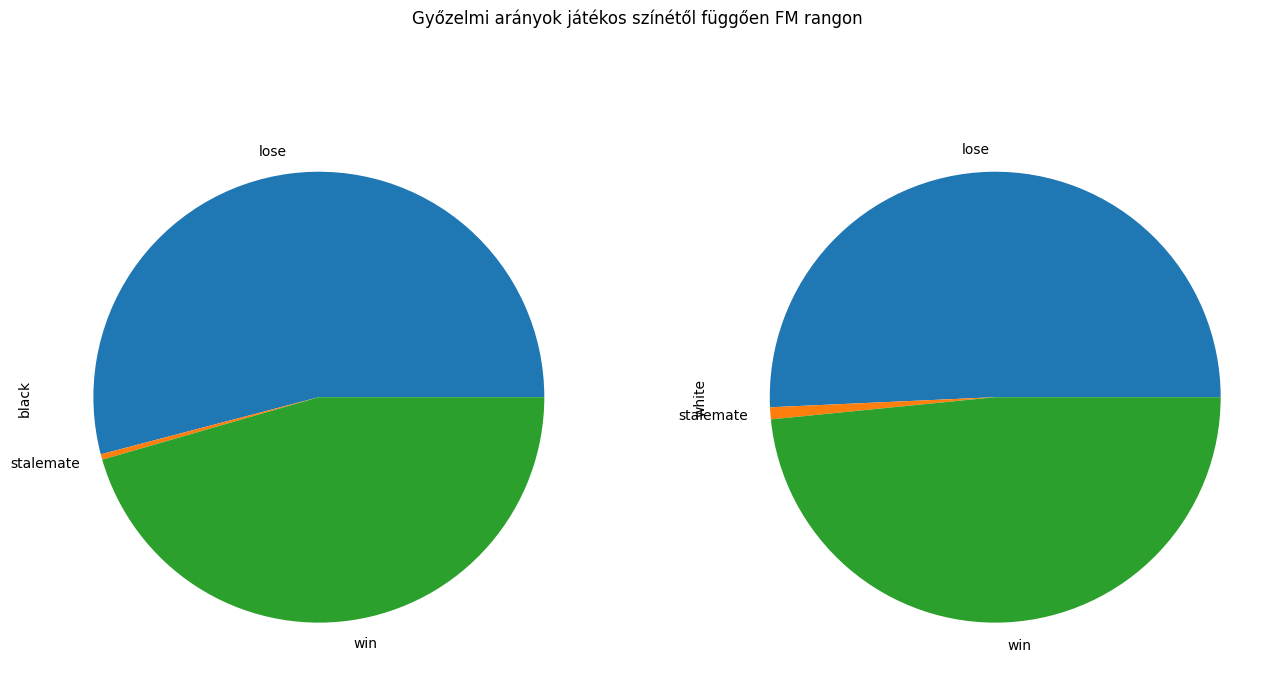

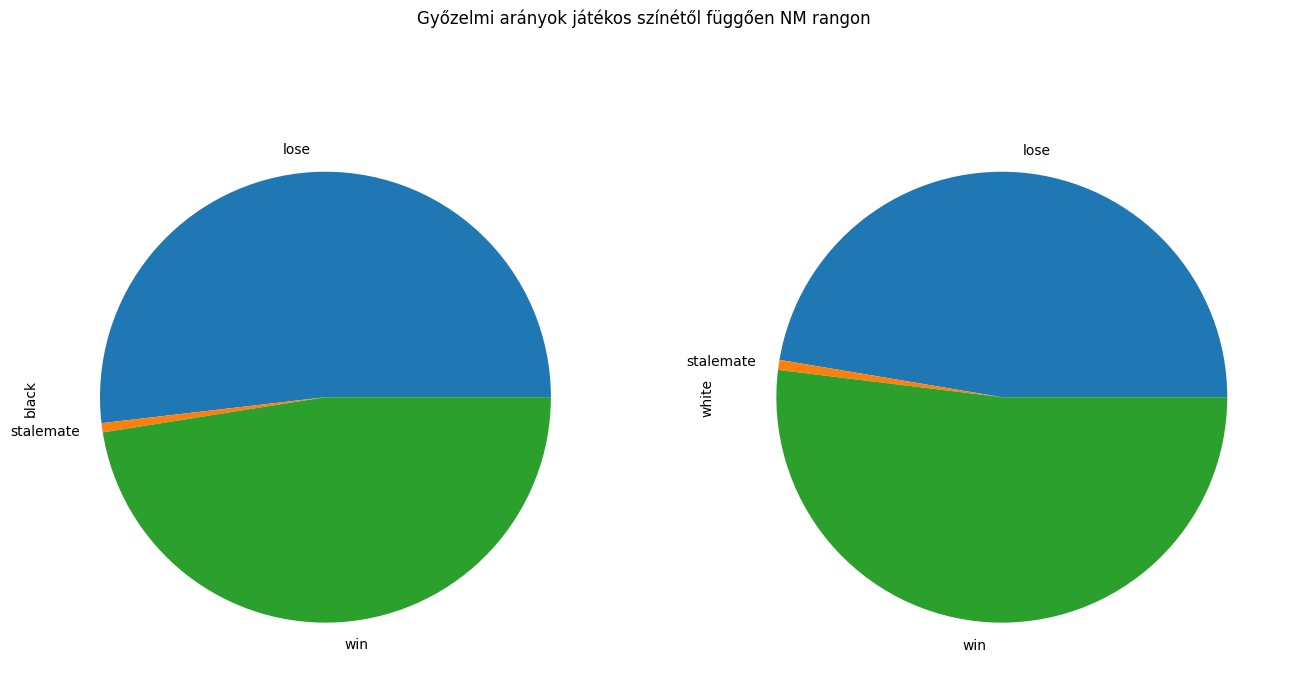

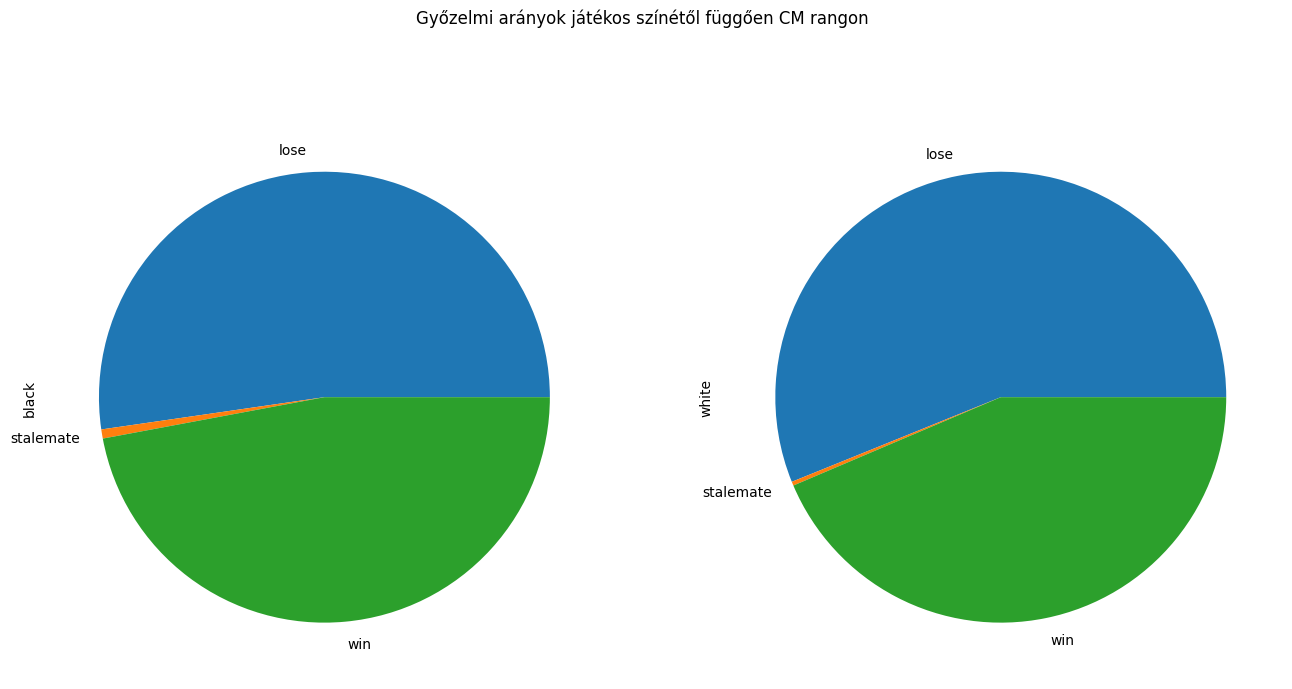

In [ ]:
sum_winperc_white = 0
sum_winperc_black = 0
sum_loseperc_white = 0
sum_loseperc_black = 0

total = 0

def add_perc_to_sum(perc):
  global sum_winperc_white, sum_winperc_black, sum_loseperc_white, sum_loseperc_black
  sum_winperc_white += perc[0]
  sum_loseperc_white += perc[1]
  sum_winperc_black += perc[2]
  sum_loseperc_black += perc[3]

winRateColorPlot(df_gm_total,'pie','GM')
gm_perc = get_w_b_winrates(df_gm_total)
add_perc_to_sum(gm_perc)
total += len(df_gm_total)

winRateColorPlot(df_im_total,'pie','IM')
im_perc = get_w_b_winrates(df_im_total)
add_perc_to_sum(im_perc)
total += len(df_im_total)

winRateColorPlot(df_fm_total,'pie','FM')
fm_perc = get_w_b_winrates(df_fm_total)
add_perc_to_sum(fm_perc)
total += len(df_fm_total)

winRateColorPlot(df_nm_total,'pie','NM')
nm_perc = get_w_b_winrates(df_nm_total)
add_perc_to_sum(nm_perc)
total += len(df_nm_total)

winRateColorPlot(df_cm_total,'pie','CM')
cm_perc = get_w_b_winrates(df_cm_total)
add_perc_to_sum(cm_perc)
total += len(df_cm_total)

In [ ]:
print('White win rate: ' + str(sum_winperc_white/5*100) + '%')
print('White lose rate: ' + str(sum_loseperc_white/5*100) + '%')
print('White stalemate rate: ' + str(5 - sum_loseperc_white - sum_winperc_white) + '%')
print('Black win rate: ' + str(sum_winperc_black/5*100) + '%')
print('Black lose rate: ' + str(sum_loseperc_black/5*100) + '%')
print('Black stalemate rate: ' + str(5 - sum_loseperc_black - sum_winperc_black) + '%')

White win rate: 50.20089599591774%
White lose rate: 49.19268601772012%
White stalemate rate: 0.030320899318106775%
Black win rate: 44.98049734780758%
Black lose rate: 54.487339481414864%
Black stalemate rate: 0.02660815853887799%


White win rate: 49.957533548496684%
White lose rate: 49.464922711058264%
White stalemate rate: 0.5775437404450514%
Black win rate: 44.67226890756302%
Black lose rate: 54.8235294117647%
Black stalemate rate: 0.5042016806722813%


array([<Axes: ylabel='black'>, <Axes: ylabel='white'>], dtype=object)

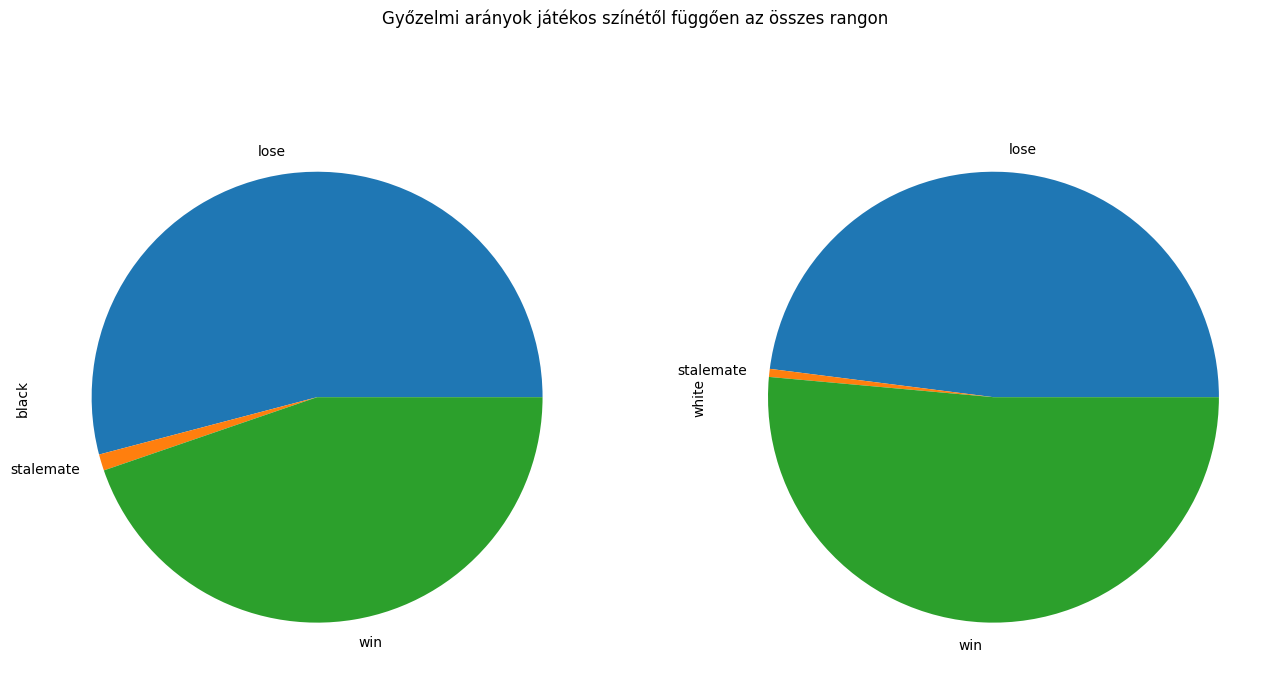

In [ ]:
winRateColorPlot(df_total,'pie','az összes')

queen     3971
king      2783
knight    2355
rook      1610
bishop    1018
pawn        84
Name: count, dtype: int64


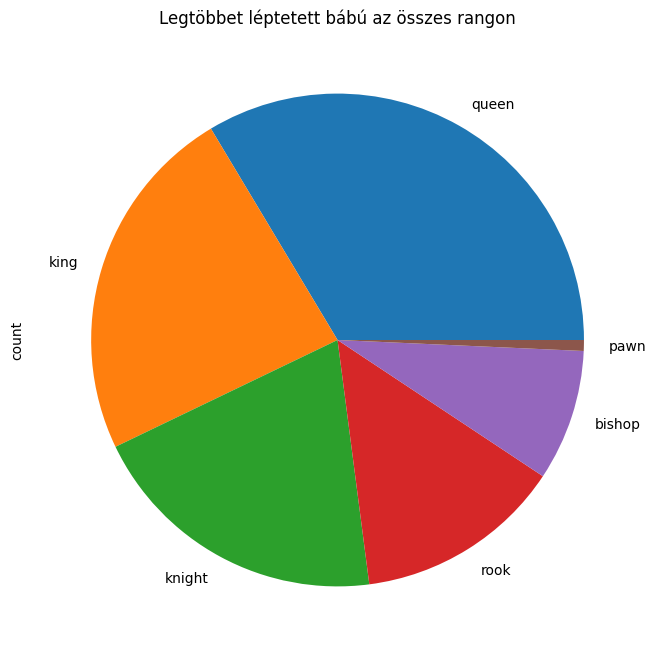

In [ ]:
favPiecesPlot(df_total,'pie','az összes')

Games ended by Checkmate or Stalemate:  2611
Games ended by Checkmate:  2001
Games ended by Stalemate:  610


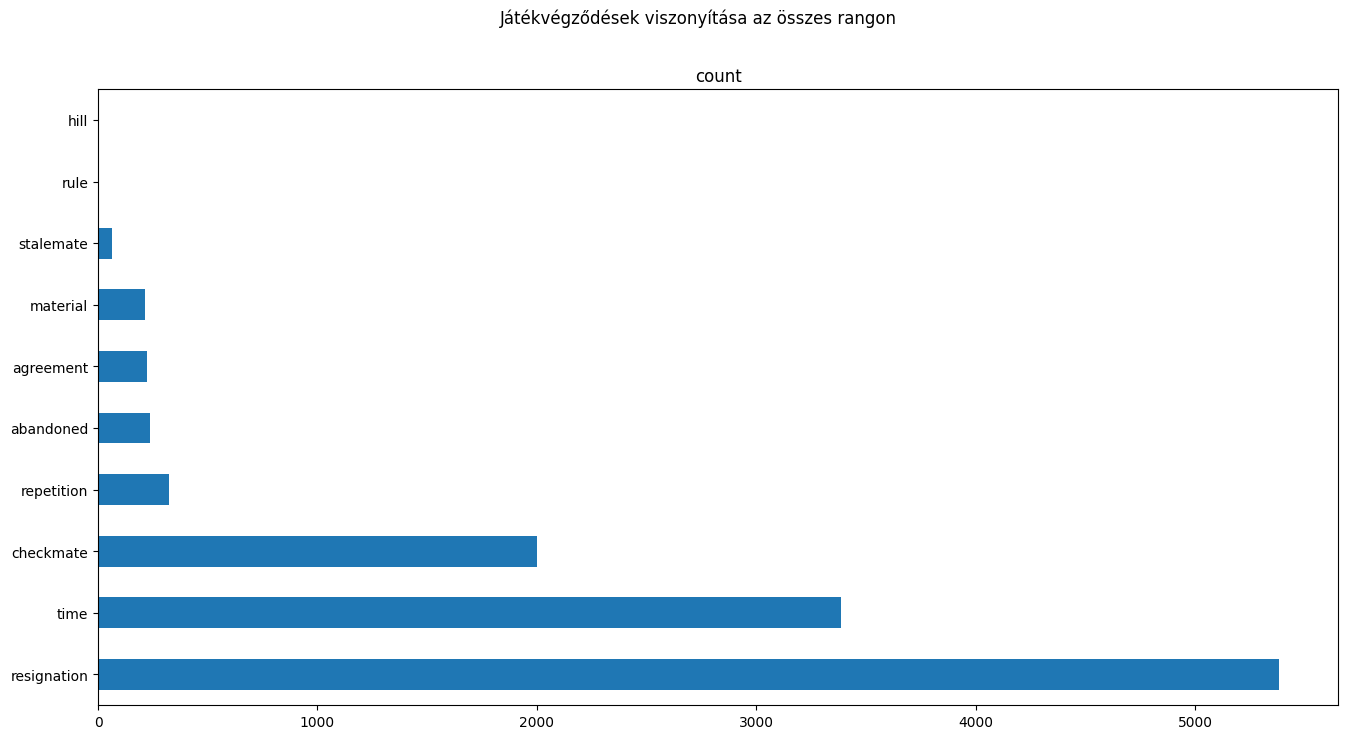

In [ ]:
getCorS(df_total,'barh','az összes')
# note ehhez a hill és a rule külön spec játékokmódokhoztalá tartoznak

In [ ]:
df_total

,name,color,opponent_color,opponent,ECO,opening,outcome,mode,white_steps,white_fav_piece,black_steps,black_fav_piece,num_white_steps,num_black_steps,total_steps,steps,white_times,white_avg_time,black_times,black_avg_time
0,123lt,white,black,young_catalan_player09,D10,"Slav Defense; Czech Defense, QGD; D10",win,resignation,"[d4, c4, cxd5, Bf4, Nc3, e3, Bd3, Nge2, O-O, f...",knight,"[d5, c6, cxd5, Nf6, Nc6, a6, Bg4, e6, Bd6, Bh5...",queen,33.0,33.0,66.0,"[d4, d5, c4, c6, cxd5, cxd5, Bf4, Nf6, Nc3, Nc...","[0:03:00.9, 0:02:59.4, 0:02:58.8, 0:02:59.2, 0...",4.093750,"[0:02:49, 0:02:48.6, 0:02:45.7, 0:02:45.9, 0:0...",2.625000
1,124chess,white,black,gmakobianstl,A45,Indian Defense; A45,win,resignation,"[d4, Bf4, e3, Nf3, Nbd2, Nc4, Nce5, Bb5, Ng5, ...",knight,"[e6, Nf6, c5, b6, Bb7, d5, Nbd7, a6, axb5, Qe7...",king,33.0,32.0,65.0,"[d4, e6, Bf4, Nf6, e3, c5, Nf3, b6, Nbd2, Bb7,...","[0:03:00.9, 0:03:01.6, 0:03:02.1, 0:03:02.1, 0...",3.156250,"[0:02:58.8, 0:02:58.4, 0:02:58.4, 0:02:55.4, 0...",2.483871
2,1977ivan,black,white,birb_memes,C01,C01,win,time,"[e4, Nf3, exd5, d4, Bd3, O-O, Re1+, Bf1, b3, a...",king,"[e6, d5, exd5, Nf6, c5, c4, Be7, O-O, cxb3, Nc...",rook,61.0,61.0,122.0,"[e4, e6, Nf3, d5, exd5, exd5, d4, Nf6, Bd3, c5...","[0:03:00, 0:02:59.1, 0:02:59, 0:02:58.9, 0:02:...",3.000000,"[0:02:59.3, 0:02:59.2, 0:02:57.9, 0:02:52.9, 0...",2.866667
3,1stsecond,white,black,statham_01,A40,Queen's Pawn Opening; A40,win,resignation,"[d4, dxe5, Nc3, Nf3, Bf4, e3, exd6, Bg3, Bb5, ...",queen,"[e5, Bc5, d6, Ne7, Nbc6, O-O, cxd6, Be6, Ng6, ...",queen,39.0,38.0,77.0,"[d4, e5, dxe5, Bc5, Nc3, d6, Nf3, Ne7, Bf4, Nb...","[0:01:00, 0:00:59.1, 0:00:58.2, 0:00:57.7, 0:0...",1.210526,"[0:01:00, 0:00:59.6, 0:00:59, 0:00:58.5, 0:00:...",1.540541
4,4thd-alpeacefulmoon,black,white,stollenmonster,B40,"French Variation, Sicilian; B40",win,resignation,"[e4, Nf3, Be2, c4, Nc3, d4, Nxd4, O-O, b3, Bf3...",knight,"[c5, e6, a6, b6, Bb7, cxd4, d6, Nd7, Ngf6, Ne5...",knight,30.0,30.0,60.0,"[e4, c5, Nf3, e6, Be2, a6, c4, b6, Nc3, Bb7, d...","[0:03:02, 0:03:02.8, 0:03:03.8, 0:03:05, 0:03:...",3.206897,"[0:03:01.6, 0:03:02.5, 0:02:55.4, 0:02:54, 0:0...",1.965517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12001,yujiarun18,black,white,matchurowgers,E06,"Closed Variation, Catalan",lose,resignation,"[d4, c4, Nf3, g3, Bg2, O-O, Nc3, Nd2, e4, Ndxe...",king,"[d5, e6, Nf6, Be7, O-O, c6, b6, Bb7, dxe4, Nxe...",rook,57.0,56.0,113.0,"[d4, d5, c4, e6, Nf3, Nf6, g3, Be7, Bg2, O-O, ...","[0:02:59.9, 0:02:59, 0:02:58.2, 0:02:57.7, 0:0...",2.053571,"[0:02:58.9, 0:02:58.6, 0:02:58.2, 0:02:57.8, 0...",1.781818
12002,zainabma,black,white,x-or,B00,King's Pawn Opening; B00,lose,time,"[e4, Nf3, d3, e5, c3, d4, exd6, Bb5, Qe2, O-O,...",queen,"[b6, Bb7, e6, c5, Nc6, d5, Bxd6, Nf6, O-O, cxd...",queen,20.0,19.0,39.0,"[e4, b6, Nf3, Bb7, d3, e6, e5, c5, c3, Nc6, d4...","[0:01:00, 0:00:59.6, 0:00:59.4, 0:00:59.2, 0:0...",1.263158,"[0:01:00, 0:00:58.8, 0:00:57.3, 0:00:56.6, 0:0...",1.888889
12003,zaineb218,black,white,lyoa,D20,Queen's Gambit Accepted; D20,win,resignation,"[d4, c4, e3, a4, Bxc4, Nf3, Nc3, Bd2, Qxd2, O-...",queen,"[d5, dxc4, a6, Nf6, e6, Bb4+, Ne4, Nxd2, O-O, ...",knight,25.0,25.0,50.0,"[d4, d5, c4, dxc4, e3, a6, a4, Nf6, Bxc4, e6, ...","[0:03:02, 0:03:02.2, 0:03:00, 0:02:58.2, 0:02:...",6.500000,"[0:03:01.5, 0:03:00.9, 0:03:00.6, 0:02:53.3, 0...",5.000000
12004,zarinur,white,black,frederickthemate,B31,B31,lose,resignation,"[e4, Nf3, Bb5, O-O, c3, d4, cxd4, Bf4, Bc4, Nb...",king,"[c5, Nc6, g6, Bg7, e5, cxd4, exd4, a6, d6, Nge...",queen,44.0,44.0,88.0,"[e4, c5, Nf3, Nc6, Bb5, g6, O-O, Bg7, c3, e5, ...","[0:03:00.9, 0:03:00.2, 0:02:59.2, 0:02:58.2, 0...",4.116279,"[0:02:59.7, 0:03:00.2, 0:02:59.7, 0:03:00.2, 0...",3.651163


**Melyik nyitás melyik ellen hasznos, melyek a legnépszerűbb nyitások**

In [ ]:
def plotECOs(df,plotType,title,n):
  df['opening'].value_counts()[:n].plot(kind=plotType,title = 'Legnépszerűbb '+ str(n) + ' nyitás ' + title + ' rangon',figsize=(16,8),legend=False)

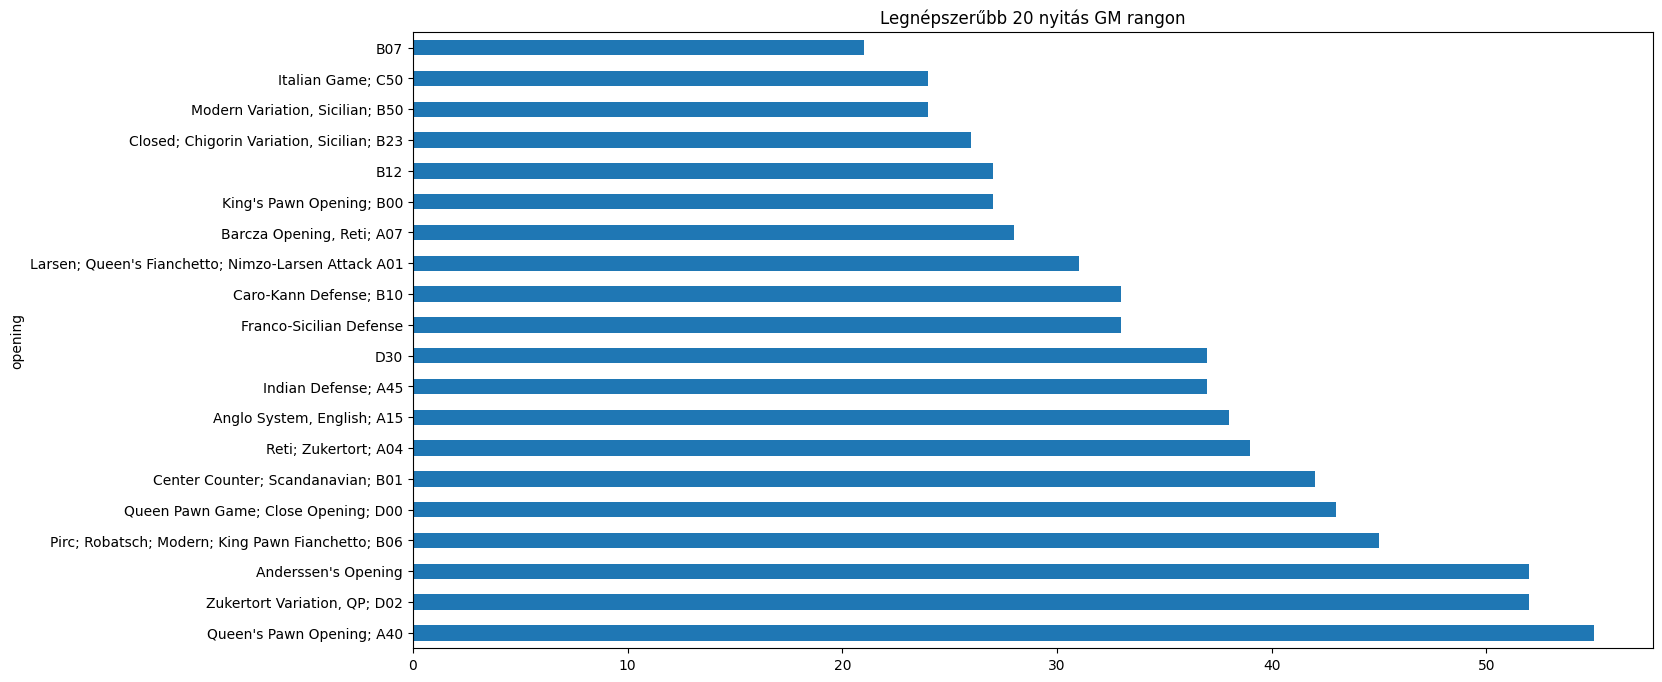

In [ ]:
plotECOs(df_gm_total,'barh','GM',20)

In [ ]:
df_opening_codes

,ECO,name,moves
0,B00,King's Pawn Opening; B00,e4
1,A40,Queen's Pawn Opening; A40,d4
2,A00,Anderssen's Opening,a3
3,A00,"Polish Gambit, Anderssen's Opening",a3 a5 b4
4,A00,Creepy Crawly Formation,a3 e5 h3 d5
...,...,...,...
2722,A04,Lessing Defense,Nf3 Nc6
2723,A05,King's Indian Attack; Reti; Zukertort; A05,Nf3 Nf6
2724,A00,Amar; Paris Opening,Nh3
2725,A00,Drunken Knight Opening,Nh3


In [ ]:
mean = df_total[df_total['mode']=='resignation']['total_steps'].mean()
median = df_total[df_total['mode']=='resignation']['total_steps'].median()

print('Átlag: ', mean, ' medián: ',median)

Átlag:  68.14229910714286  medián:  64.0


1.0

In [ ]:

df_total

,name,color,opponent_color,opponent,ECO,opening,outcome,mode,white_steps,white_fav_piece,black_steps,black_fav_piece,num_white_steps,num_black_steps,total_steps,steps,white_times,white_avg_time,black_times,black_avg_time
0,123lt,white,black,young_catalan_player09,D10,"Slav Defense; Czech Defense, QGD; D10",win,resignation,"[d4, c4, cxd5, Bf4, Nc3, e3, Bd3, Nge2, O-O, f...",knight,"[d5, c6, cxd5, Nf6, Nc6, a6, Bg4, e6, Bd6, Bh5...",queen,33.0,33.0,66.0,"[d4, d5, c4, c6, cxd5, cxd5, Bf4, Nf6, Nc3, Nc...","[0:03:00.9, 0:02:59.4, 0:02:58.8, 0:02:59.2, 0...",4.093750,"[0:02:49, 0:02:48.6, 0:02:45.7, 0:02:45.9, 0:0...",2.625000
1,124chess,white,black,gmakobianstl,A45,Indian Defense; A45,win,resignation,"[d4, Bf4, e3, Nf3, Nbd2, Nc4, Nce5, Bb5, Ng5, ...",knight,"[e6, Nf6, c5, b6, Bb7, d5, Nbd7, a6, axb5, Qe7...",king,33.0,32.0,65.0,"[d4, e6, Bf4, Nf6, e3, c5, Nf3, b6, Nbd2, Bb7,...","[0:03:00.9, 0:03:01.6, 0:03:02.1, 0:03:02.1, 0...",3.156250,"[0:02:58.8, 0:02:58.4, 0:02:58.4, 0:02:55.4, 0...",2.483871
2,1977ivan,black,white,birb_memes,C01,C01,win,time,"[e4, Nf3, exd5, d4, Bd3, O-O, Re1+, Bf1, b3, a...",king,"[e6, d5, exd5, Nf6, c5, c4, Be7, O-O, cxb3, Nc...",rook,61.0,61.0,122.0,"[e4, e6, Nf3, d5, exd5, exd5, d4, Nf6, Bd3, c5...","[0:03:00, 0:02:59.1, 0:02:59, 0:02:58.9, 0:02:...",3.000000,"[0:02:59.3, 0:02:59.2, 0:02:57.9, 0:02:52.9, 0...",2.866667
3,1stsecond,white,black,statham_01,A40,Queen's Pawn Opening; A40,win,resignation,"[d4, dxe5, Nc3, Nf3, Bf4, e3, exd6, Bg3, Bb5, ...",queen,"[e5, Bc5, d6, Ne7, Nbc6, O-O, cxd6, Be6, Ng6, ...",queen,39.0,38.0,77.0,"[d4, e5, dxe5, Bc5, Nc3, d6, Nf3, Ne7, Bf4, Nb...","[0:01:00, 0:00:59.1, 0:00:58.2, 0:00:57.7, 0:0...",1.210526,"[0:01:00, 0:00:59.6, 0:00:59, 0:00:58.5, 0:00:...",1.540541
4,4thd-alpeacefulmoon,black,white,stollenmonster,B40,"French Variation, Sicilian; B40",win,resignation,"[e4, Nf3, Be2, c4, Nc3, d4, Nxd4, O-O, b3, Bf3...",knight,"[c5, e6, a6, b6, Bb7, cxd4, d6, Nd7, Ngf6, Ne5...",knight,30.0,30.0,60.0,"[e4, c5, Nf3, e6, Be2, a6, c4, b6, Nc3, Bb7, d...","[0:03:02, 0:03:02.8, 0:03:03.8, 0:03:05, 0:03:...",3.206897,"[0:03:01.6, 0:03:02.5, 0:02:55.4, 0:02:54, 0:0...",1.965517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12001,yujiarun18,black,white,matchurowgers,E06,"Closed Variation, Catalan",lose,resignation,"[d4, c4, Nf3, g3, Bg2, O-O, Nc3, Nd2, e4, Ndxe...",king,"[d5, e6, Nf6, Be7, O-O, c6, b6, Bb7, dxe4, Nxe...",rook,57.0,56.0,113.0,"[d4, d5, c4, e6, Nf3, Nf6, g3, Be7, Bg2, O-O, ...","[0:02:59.9, 0:02:59, 0:02:58.2, 0:02:57.7, 0:0...",2.053571,"[0:02:58.9, 0:02:58.6, 0:02:58.2, 0:02:57.8, 0...",1.781818
12002,zainabma,black,white,x-or,B00,King's Pawn Opening; B00,lose,time,"[e4, Nf3, d3, e5, c3, d4, exd6, Bb5, Qe2, O-O,...",queen,"[b6, Bb7, e6, c5, Nc6, d5, Bxd6, Nf6, O-O, cxd...",queen,20.0,19.0,39.0,"[e4, b6, Nf3, Bb7, d3, e6, e5, c5, c3, Nc6, d4...","[0:01:00, 0:00:59.6, 0:00:59.4, 0:00:59.2, 0:0...",1.263158,"[0:01:00, 0:00:58.8, 0:00:57.3, 0:00:56.6, 0:0...",1.888889
12003,zaineb218,black,white,lyoa,D20,Queen's Gambit Accepted; D20,win,resignation,"[d4, c4, e3, a4, Bxc4, Nf3, Nc3, Bd2, Qxd2, O-...",queen,"[d5, dxc4, a6, Nf6, e6, Bb4+, Ne4, Nxd2, O-O, ...",knight,25.0,25.0,50.0,"[d4, d5, c4, dxc4, e3, a6, a4, Nf6, Bxc4, e6, ...","[0:03:02, 0:03:02.2, 0:03:00, 0:02:58.2, 0:02:...",6.500000,"[0:03:01.5, 0:03:00.9, 0:03:00.6, 0:02:53.3, 0...",5.000000
12004,zarinur,white,black,frederickthemate,B31,B31,lose,resignation,"[e4, Nf3, Bb5, O-O, c3, d4, cxd4, Bf4, Bc4, Nb...",king,"[c5, Nc6, g6, Bg7, e5, cxd4, exd4, a6, d6, Nge...",queen,44.0,44.0,88.0,"[e4, c5, Nf3, Nc6, Bb5, g6, O-O, Bg7, c3, e5, ...","[0:03:00.9, 0:03:00.2, 0:02:59.2, 0:02:58.2, 0...",4.116279,"[0:02:59.7, 0:03:00.2, 0:02:59.7, 0:03:00.2, 0...",3.651163
